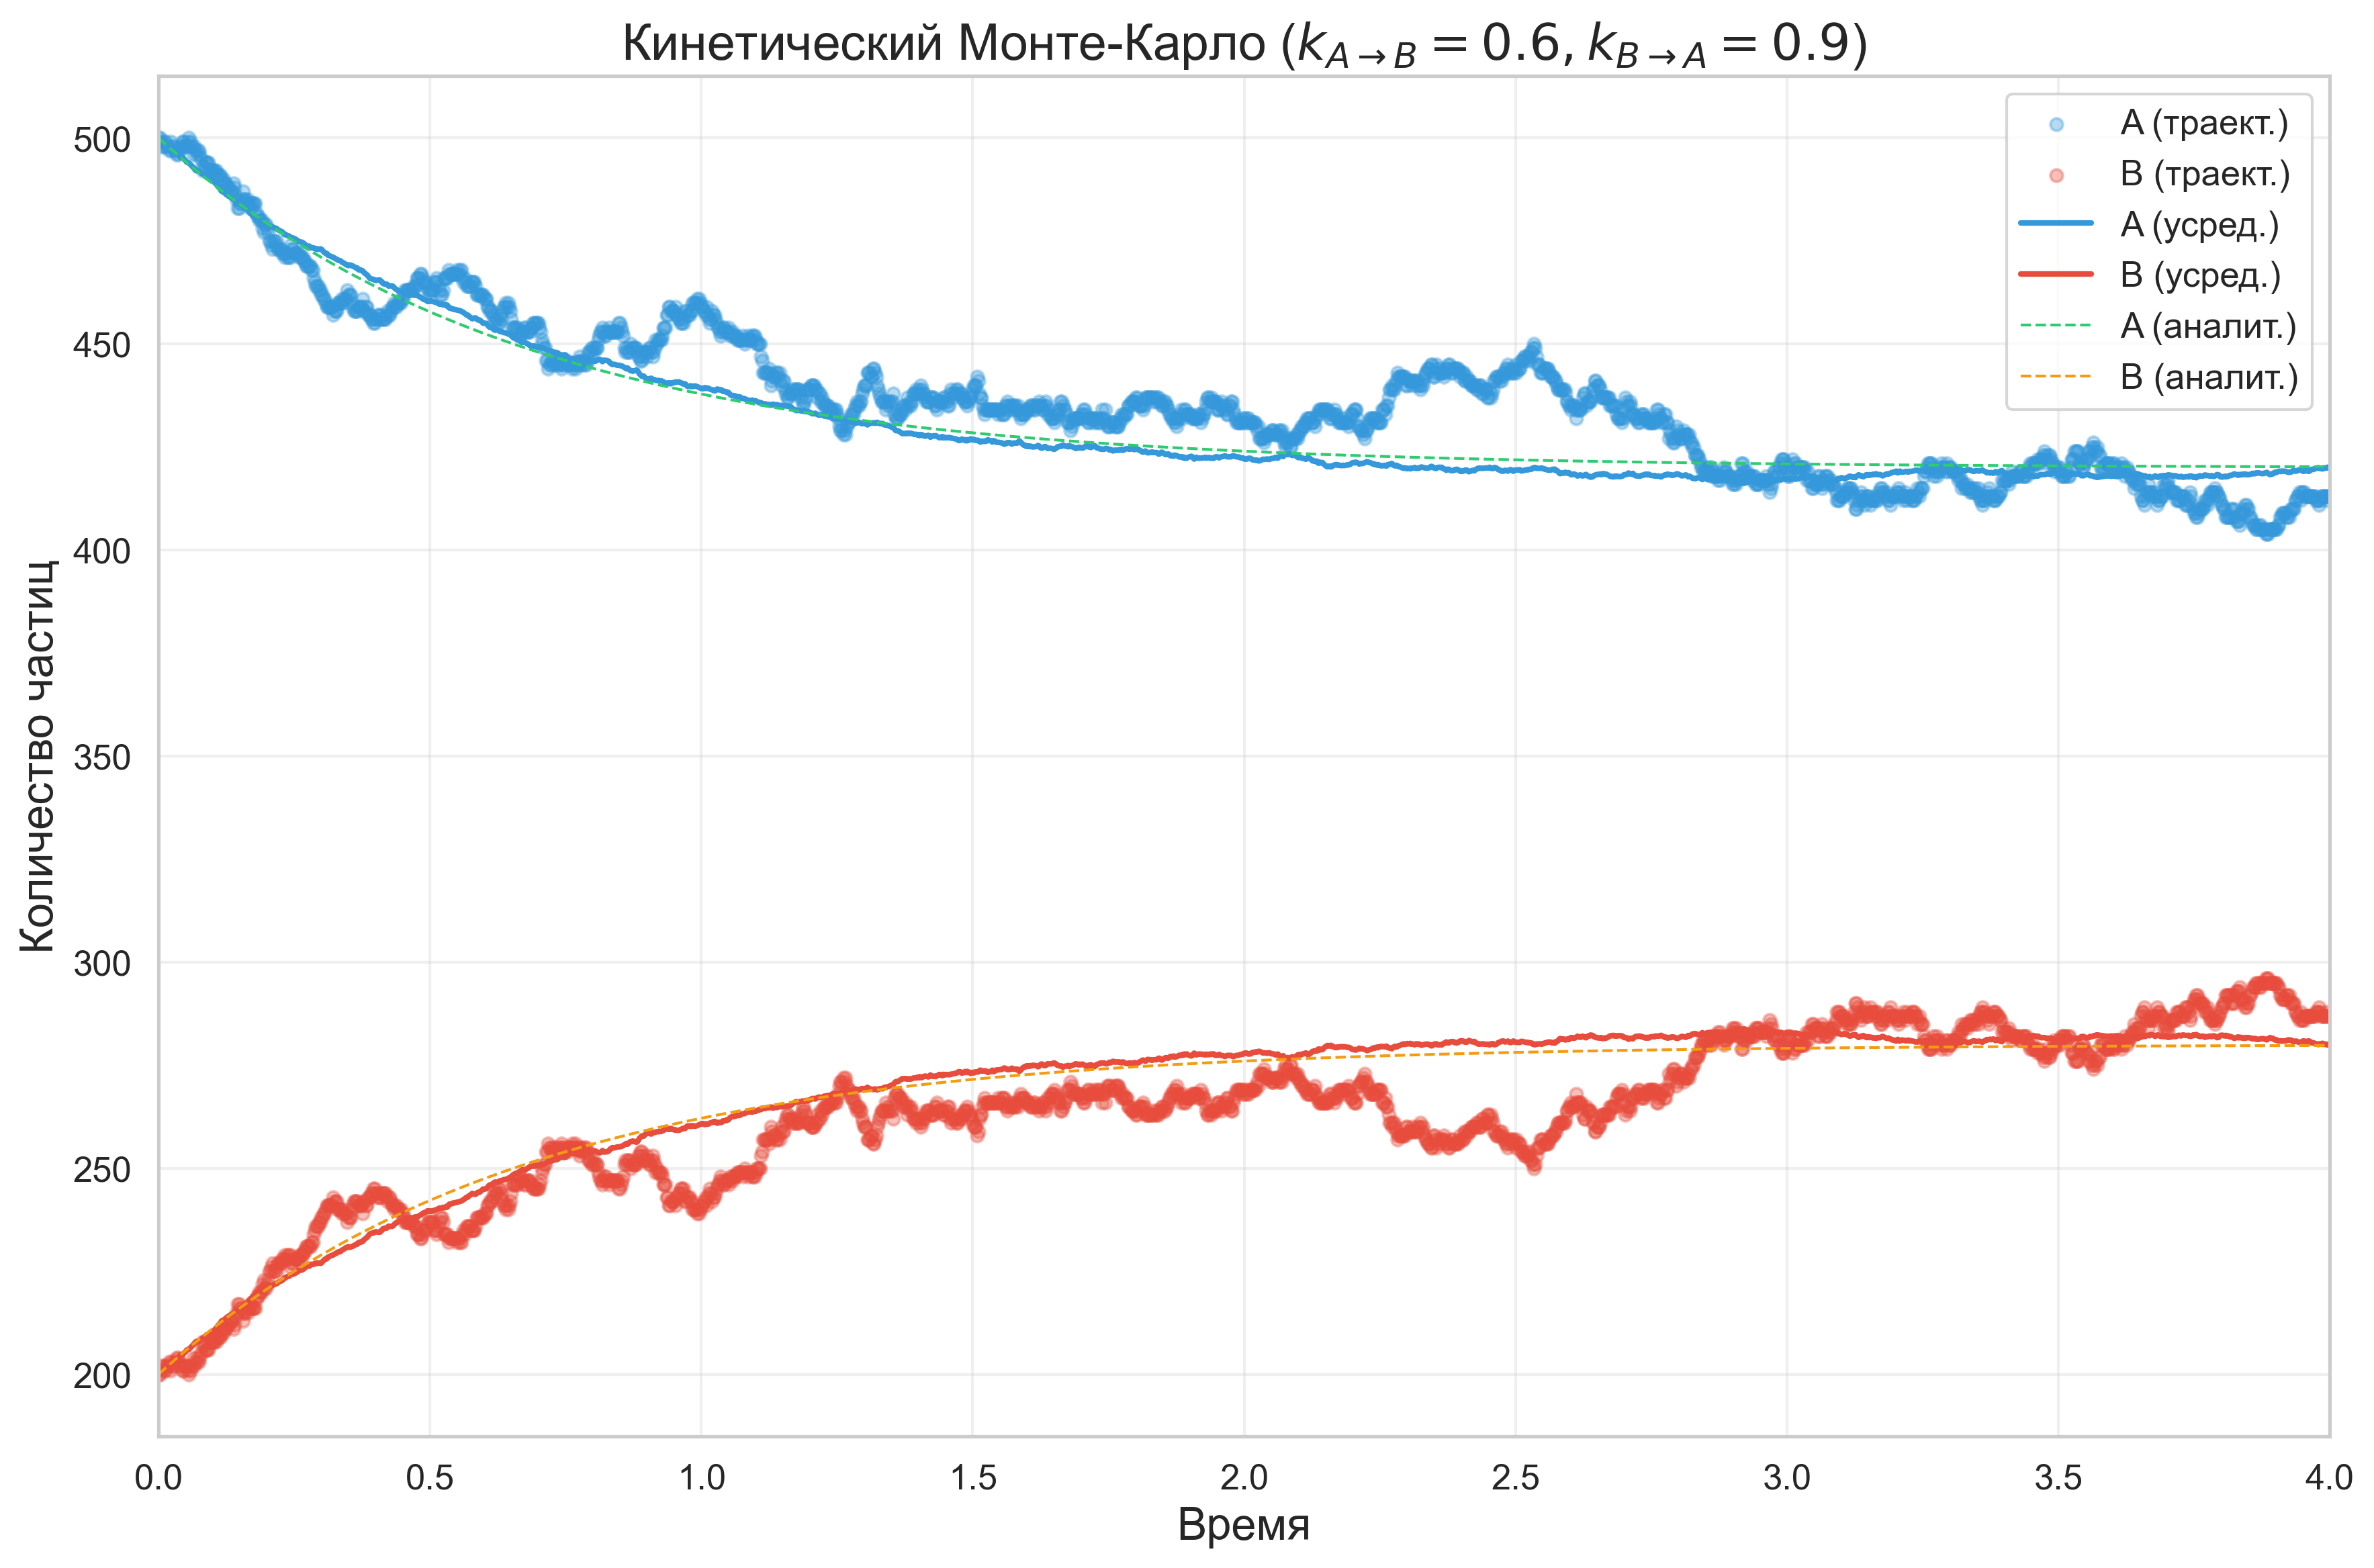

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns


sns.set_style("whitegrid")
sns.set_palette(["#3498db", "#e74c3c", "#2ecc71", "#f39c12"])
sns.set_context("notebook", font_scale=1.15)

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300



def solve_rate_equations(time, A_initial, B_initial, rate_A_to_B, rate_B_to_A):
    total_particles = A_initial + B_initial
    relaxation = np.exp(-(rate_A_to_B + rate_B_to_A) * time)

    A_conc = (
        rate_B_to_A / (rate_A_to_B + rate_B_to_A) * total_particles
        + (A_initial * rate_A_to_B - B_initial * rate_B_to_A)
        / (rate_A_to_B + rate_B_to_A) * relaxation
    )

    B_conc = (
        rate_A_to_B / (rate_A_to_B + rate_B_to_A) * total_particles
        - (A_initial * rate_A_to_B - B_initial * rate_B_to_A)
        / (rate_A_to_B + rate_B_to_A) * relaxation
    )

    return A_conc, B_conc


def run_kmc_simulation(
    A_initial, B_initial, t_final, time_step,
    rate_A_to_B, rate_B_to_A
):
    num_steps = int(t_final / time_step)

    A_history = np.zeros(num_steps + 1)
    B_history = np.zeros(num_steps + 1)

    A_count = A_initial
    B_count = B_initial

    A_history[0] = A_count
    B_history[0] = B_count

    for step in range(1, num_steps + 1):
        total_particles = A_count + B_count

        for _ in range(total_particles):
            if random.random() < A_count / total_particles:
                if random.random() < rate_A_to_B * time_step:
                    A_count -= 1
                    B_count += 1
            else:
                if random.random() < rate_B_to_A * time_step:
                    A_count += 1
                    B_count -= 1

        A_history[step] = A_count
        B_history[step] = B_count

    time_axis = np.arange(0, t_final + time_step, time_step)
    return time_axis, A_history, B_history


A_initial = 500
B_initial = 200

t_final = 4
time_step = 0.002

rate_A_to_B = 0.6
rate_B_to_A = 0.9

num_realizations = 50
time_axis = np.arange(0, t_final + time_step, time_step)

A_ensemble = np.zeros((num_realizations, len(time_axis)))
B_ensemble = np.zeros((num_realizations, len(time_axis)))


for i in range(num_realizations):
    time, A_history, B_history = run_kmc_simulation(
        A_initial, B_initial,
        t_final, time_step,
        rate_A_to_B, rate_B_to_A
    )
    A_ensemble[i, :] = A_history
    B_ensemble[i, :] = B_history


A_mean = np.mean(A_ensemble, axis=0)
B_mean = np.mean(B_ensemble, axis=0)

A_exact, B_exact = solve_rate_equations(
    time_axis,
    A_initial, B_initial,
    rate_A_to_B, rate_B_to_A
)


marker_size = 20

plt.scatter(time_axis, A_ensemble[0], alpha=0.35, s=marker_size, label='A (траект.)')
plt.scatter(time_axis, B_ensemble[0], alpha=0.35, s=marker_size, label='B (траект.)')

plt.plot(time_axis, A_mean, linewidth=2, label='A (усред.)')
plt.plot(time_axis, B_mean, linewidth=2, label='B (усред.)')

plt.plot(time_axis, A_exact, '--', linewidth=1, label='A (аналит.)')
plt.plot(time_axis, B_exact, '--', linewidth=1, label='B (аналит.)')

plt.xlabel('Время', fontsize=16)
plt.ylabel('Количество частиц', fontsize=16)

plt.title(
    f'Кинетический Монте-Карло '
    f'($k_{{A\\to B}}={rate_A_to_B}, k_{{B\\to A}}={rate_B_to_A}$)',
    fontsize=18
)

plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, t_final)
plt.tight_layout()
plt.show()
